In [1]:
library(data.table)
library(dplyr)
library(ggplot2)
library(umap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## 1mb
in_path = "/Ecker2019_3DVI/Counts_1mb_filter2500/"
# embed_full = c()
# for(c in c(1:22, "X")){ 
#     chrom = paste0("chr", c)
#     embed = fread(paste0(in_path, chrom, "/latentEmbeddings/norm3DVI_latentEmbeddingFull.txt"))
#     embed_full = cbind(embed_full, embed)
# }
embed_full = readRDS(file = "/Ecker2019_3DVI/RDS/mergeEmbed_1mb.rds")
embed_pca = prcomp(embed_full)$x[, 1:500]
saveRDS(embed_pca, file = "/Ecker2019_3DVI/RDS/mergeEmbed_1mb_pca.rds")


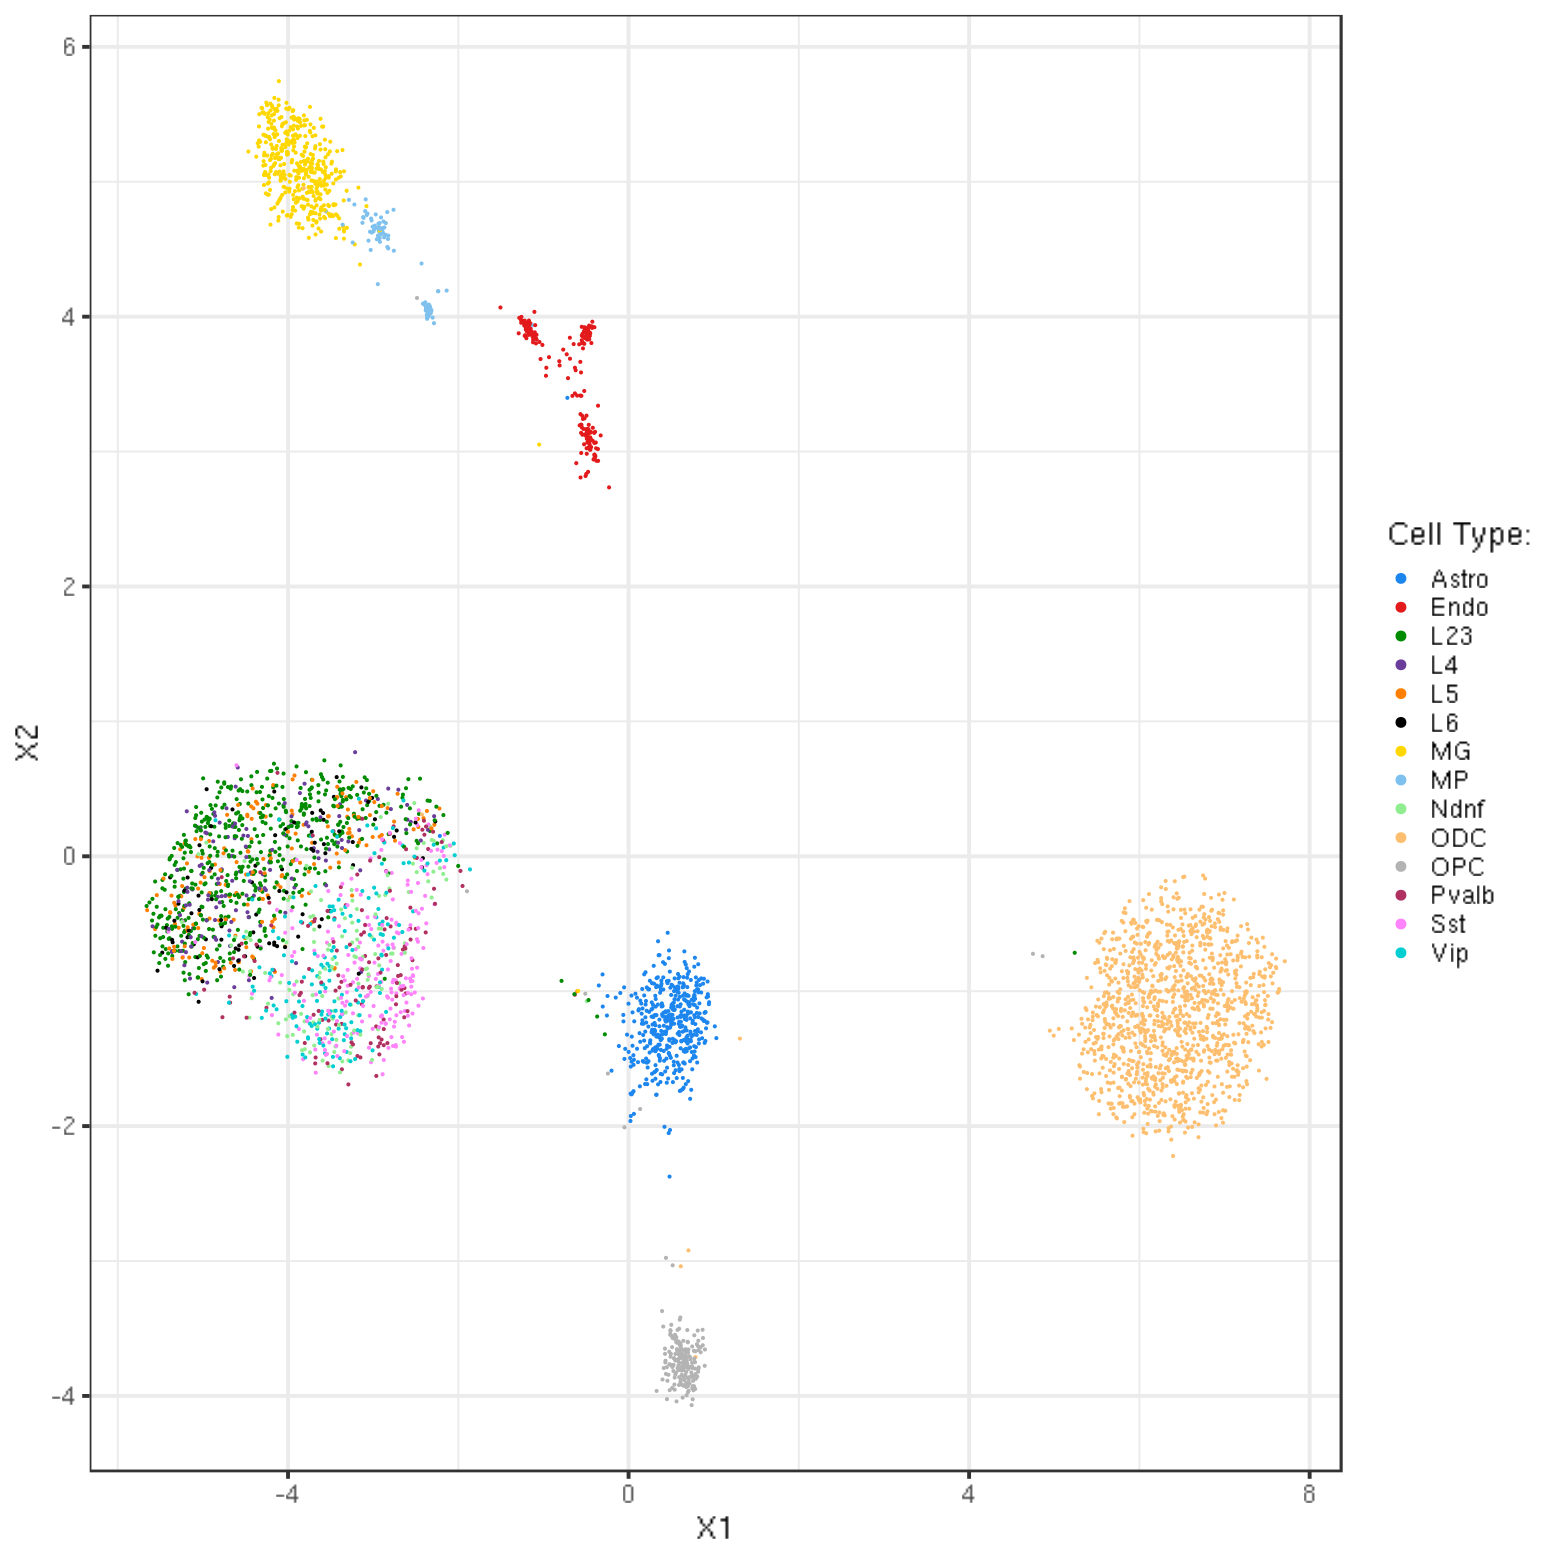

In [56]:
options(repr.plot.width=13, repr.plot.height=13)
embed_pca = prcomp(embed_full)$x[, 1:250]
embed_umap = umap(embed_pca[, 1:150])

schic_label = read.table("/fh/fast/gottardo_r/yezheng_working/others/scHiC/data/Ecker2019/Ecker2019_summary_3DVI_python_sort.txt", header = TRUE)
embed_data = data.frame(embed_umap$layout) %>% mutate(celltype = schic_label$cell_type)

# # head(embed_data)
embed_data %>% ggplot(aes(x = X1, y = X2, color = celltype)) +
geom_point(size = 0.1) + 
    theme_bw(base_size = 18) +
    scale_color_manual(breaks = c("Astro", "Endo", "L23", "L4", 'L5', 'L6', 'MG', 'MP', 'Ndnf',
                    'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip'),
                   values = c("dodgerblue2", "#E31A1C", "green4", "#6A3D9A", "#FF7F00",
         "black", "gold1", "skyblue2", "palegreen2", "#FDBF6F",
         "gray70", "maroon", "orchid1", "darkturquoise", "darkorange4",
         "brown")) +
    guides(colour = guide_legend(title = "Cell Type: ", override.aes = list(size = 2)))

